# Практика 13


Дан конечный автомат:
A = { a, b, c } (три возможных входных символа);
Σ = { 0, 1, 2, 3, 4 } (пять возможных состояний автомата);
𝑠0 = 0;
F = { 4 } (одно принимающее состояние);
ρ = { (a, 0) → 1, (b, 1) → 2, (b, 2) → 4, (c, 2) → 3, (b, 4) → 1, (любой 
символ, 3) → 0 }.
Диаграмма конечного автомата представлена ниже

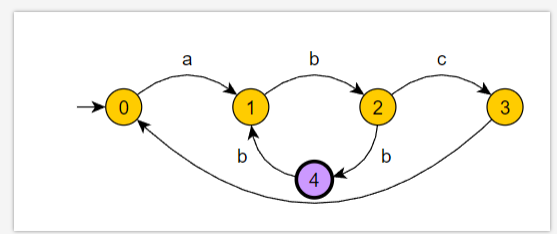

Какие строки принимает этот автомат?
Смотрим: последовательность состояний 0-1-2-3-0-… соответствует 
пропуску любого количества повторений abcs, где s — любой символ. Если же 
после этого встретится abb, то такая строка будет принята.
То же самое можно сказать об abbbb (последовательность 0-1-2-4-1-2-4). 
Вообще, благодаря циклу 1-2-4 автомат принимает “хвост” вида abb(bbb)*. 
Звёздочкой обозначено произвольное число повторений последовательности в 
скобках, т.е. a и (3i–1) подряд идущих b (для любого натурального i).
Благодаря этому же циклу автомат может пропускать строчки, 
составленные не только из abcs, но из ab(bbb)*cs, т.е. с группами по (3i–2) 
подряд идущих b.
Напишите программу, имитирующую работу данного конечного 
автомата

In [1]:
def simulate(input_string):
    current_state = 0
    for symbol in input_string:
        if current_state == 0:
            if symbol == 'a':
                current_state = 1
        elif current_state == 1:
            if symbol == 'b':
                current_state = 2
        elif current_state == 2:
            if symbol == 'b':
                current_state = 4
            elif symbol == 'c':
                current_state = 3
        elif current_state == 3:
            if symbol == 'b':
                current_state = 0
        elif current_state == 4:
            if symbol == 'b':
                current_state = 1
    return current_state == 4

# Пример использования

strings = ['abcs', 'abb', 'abbbb']

for string in strings:
    if simulate(string):
        print(f'Автомат принимает строку: {string}')
    else:
        print(f'Автомат не принимает строку: {string}')

Автомат не принимает строку: abcs
Автомат принимает строку: abb
Автомат не принимает строку: abbbb
